# Visualizacion Precipitaciones

In [2]:
import matplotlib.pyplot as plt
import scripts.data as data

analysis_data = data.load_analysis_data()
precipitations = analysis_data.filter(regex="Precip")
precipitations.head()

,,PrecipDays,PrecipMm
Year,Month,,
1991,Enero,7.0,190.0
1992,Enero,9.0,111.9
1993,Enero,6.0,122.5
1994,Enero,10.0,73.3
1995,Enero,5.0,49.3


### Evolucion de las Precipitaciones

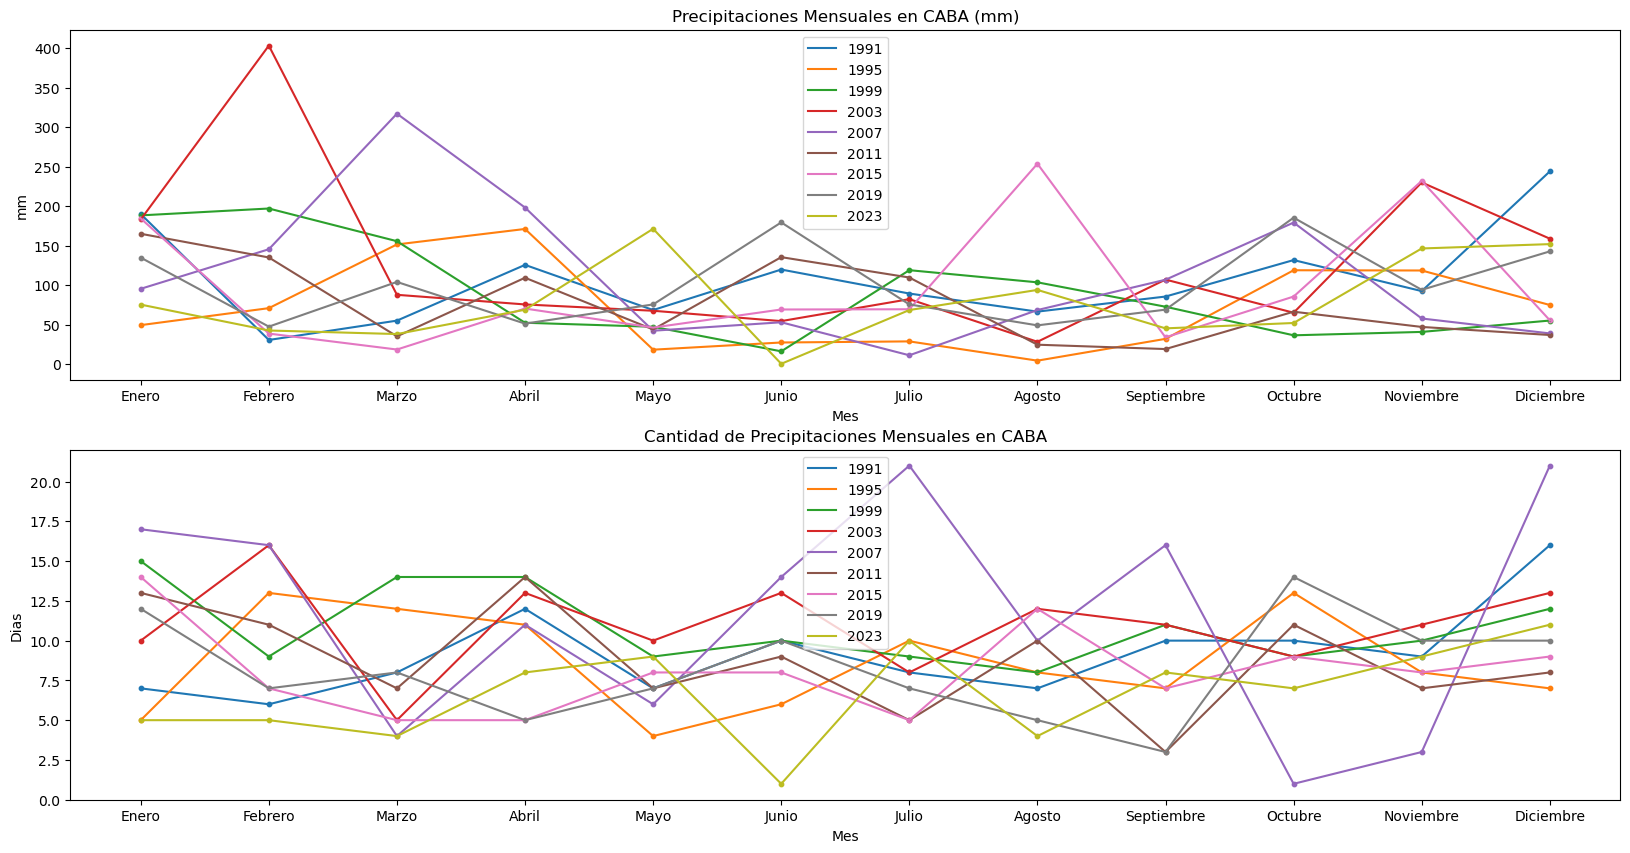

In [3]:
fig, axis = plt.subplots(2, 1)
fig.set_size_inches(20, 10)

axis[0].set_title("Precipitaciones Mensuales en CABA (mm)")
axis[0].set_ylabel("mm")
axis[0].set_xlabel("Mes")

axis[1].set_title("Cantidad de Precipitaciones Mensuales en CABA")
axis[1].set_ylabel("Dias")
axis[1].set_xlabel("Mes")

target_years = range(1991, 2024, 4)
for year, precip in precipitations.groupby("Year"):
    if year not in target_years:
        continue

    months = precip.index.get_level_values(1)
    axis[0].plot(months, precip["PrecipMm"], label=year)
    axis[0].scatter(months, precip["PrecipMm"], s=10)

    axis[1].plot(months, precip["PrecipDays"], label=year)
    axis[1].scatter(months, precip["PrecipDays"], s=10)

axis[0].legend()
axis[1].legend()

plt.show()

### Precipitaciones Totales por Año

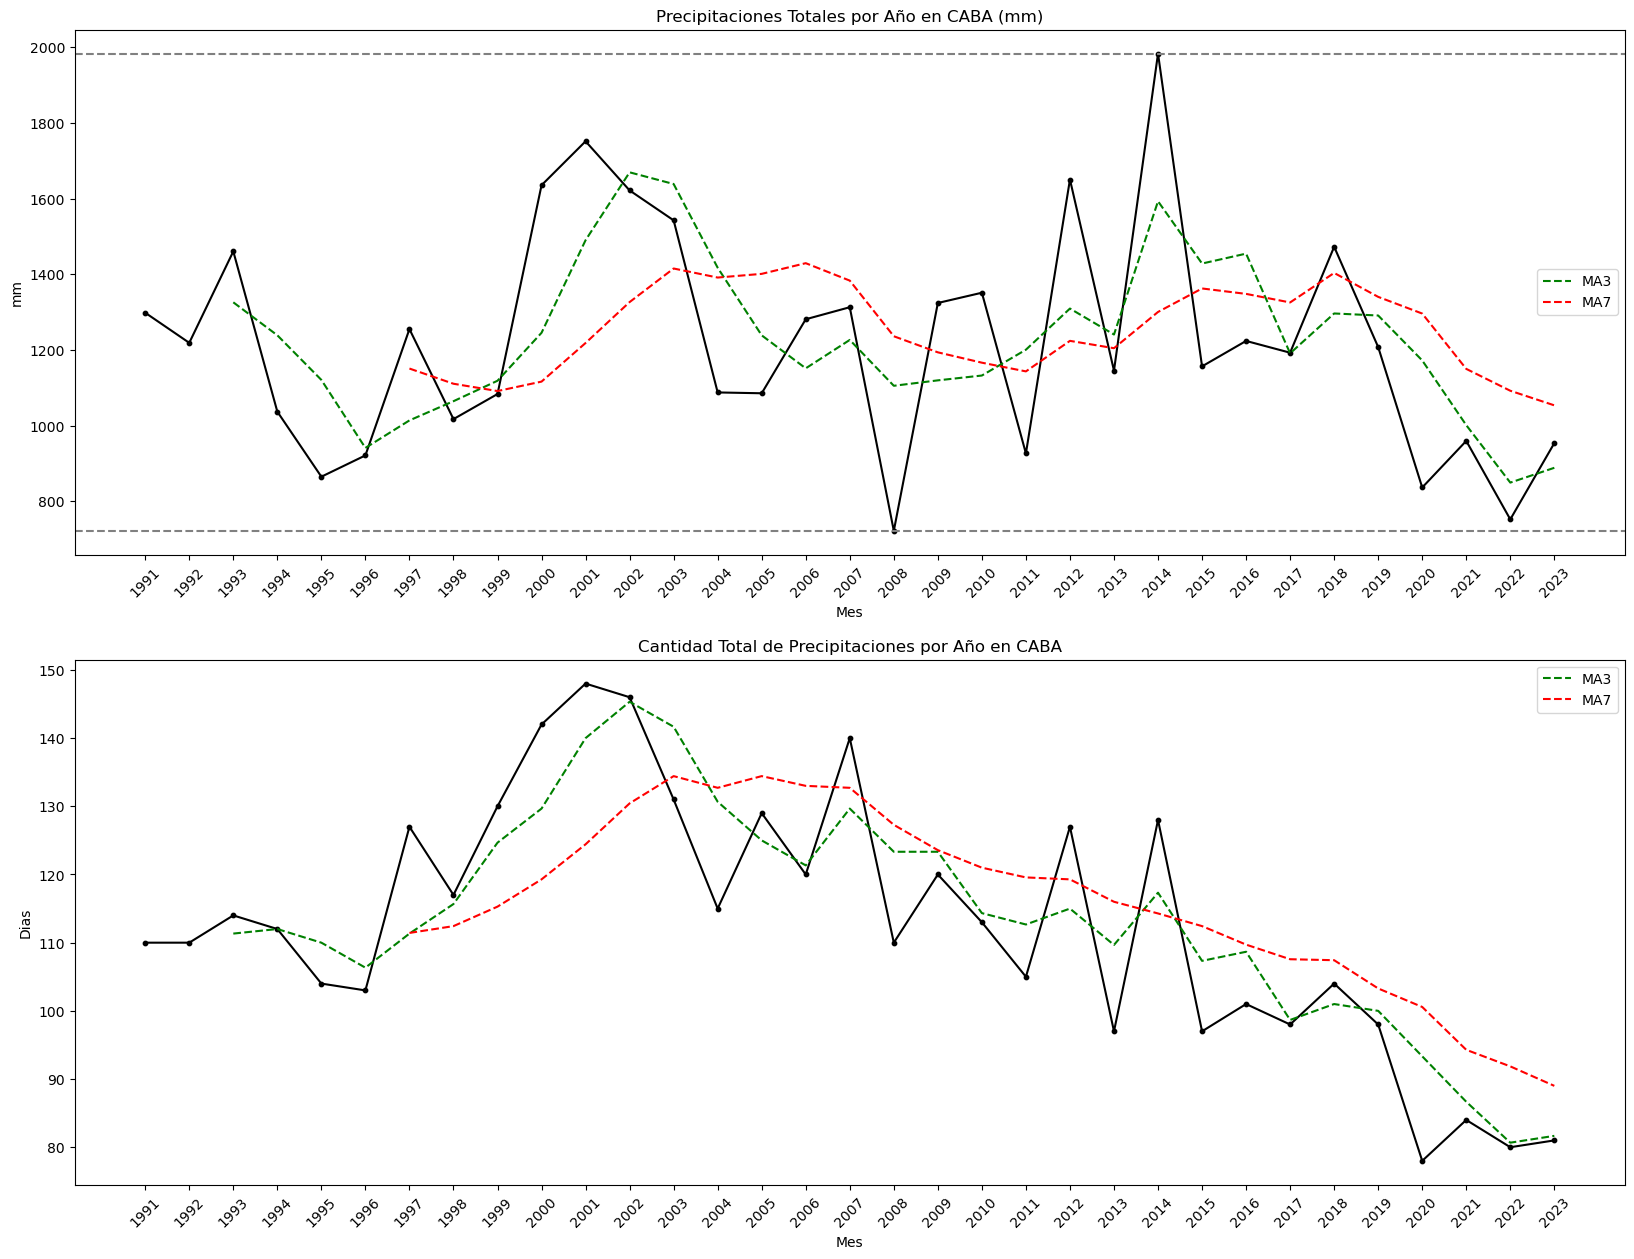

In [21]:
past_precips = precipitations.loc[precipitations.index.get_level_values(0) < 2024]
totals = past_precips.groupby("Year").sum()

fig, axis = plt.subplots(2, 1)
fig.set_size_inches(20, 15)

axis[0].set_title("Precipitaciones Totales por Año en CABA (mm)")
axis[0].set_ylabel("mm")
axis[0].set_xlabel("Mes")

axis[1].set_title("Cantidad Total de Precipitaciones por Año en CABA")
axis[1].set_ylabel("Dias")
axis[1].set_xlabel("Mes")

years = totals.index.get_level_values(0)
axis[0].set_xticks(years)
axis[0].set_xticklabels(years, rotation=45)
axis[1].set_xticks(years)
axis[1].set_xticklabels(years, rotation=45)

axis[0].plot(years, totals["PrecipMm"], color="black")
axis[0].scatter(years, totals["PrecipMm"], color="black", s=10)

# Valor máximo y mínimo
minv = totals["PrecipMm"].min()
maxv = totals["PrecipMm"].max()
axis[0].axhline(y=minv, color="gray", linestyle="--")
axis[0].axhline(y=maxv, color="gray", linestyle="--")

# Moving Average 3
axis[0].plot(
    years,
    totals["PrecipMm"].rolling(window=3).mean(),
    linestyle="--",
    color="green",
    label="MA3",
)

# Moving Average 7
axis[0].plot(
    years,
    totals["PrecipMm"].rolling(window=7).mean(),
    linestyle="--",
    color="red",
    label="MA7",
)


axis[1].plot(years, totals["PrecipDays"], color="black")
axis[1].scatter(years, totals["PrecipDays"], color="black", s=10)

# Moving Average 3
axis[1].plot(
    years,
    totals["PrecipDays"].rolling(window=3).mean(),
    linestyle="--",
    color="green",
    label="MA3",
)

# Moving Average 7
axis[1].plot(
    years,
    totals["PrecipDays"].rolling(window=7).mean(),
    linestyle="--",
    color="red",
    label="MA7",
)

axis[0].legend()
axis[1].legend()

plt.show()

No observamos una clara tendencia en cuanto a los mm de agua caidos en el año que parece mantenerse
relativamente estable entre los mismos valores. Sin embargo, si podemos observar una leve tendencia a la baja
de la cantidad de dias con precipitaciones que hay por año.

<br>
Podemos deducir, entonces, que hay una tendencia a que las precipitaciones sean menos frecuentes, pero más intensas.